<a href="https://colab.research.google.com/github/Maher1410/Sign-Language-Classification/blob/main/Sign_Language_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

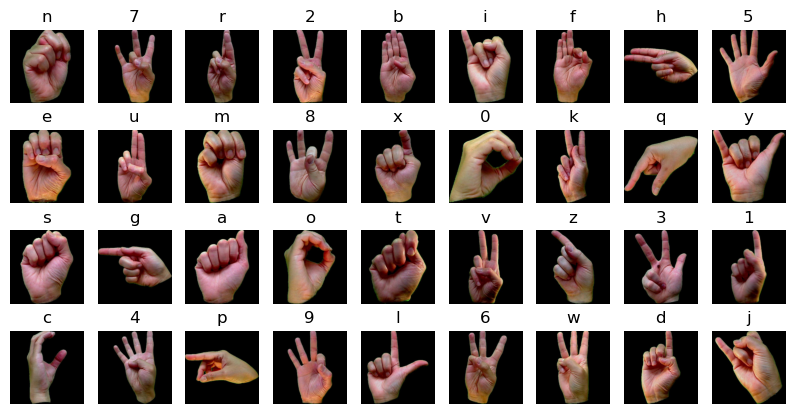

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import pickle
import numpy as np
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/asl_dataset'
data,label = [],[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    for file in files:
        full_file_path = os.path.join(root,file)
        img = cv2.imread(full_file_path)
        img = cv2.resize(img,(128,128))
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        data.append(img)
        label.append(key)

data = np.array(data)
label = np.array(label)

In [4]:
x_train, x_test0, y_train, y_test0 = train_test_split(data, label, test_size=0.2)
x_test, x_val, y_test, y_val = train_test_split(x_test0, y_test0, test_size=0.5)

In [5]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(2012, 128, 128, 3)
(2012,)
(252, 128, 128, 3)
(252,)
(251, 128, 128, 3)
(251,)


In [6]:
# Normalization
x_train = x_train/255.0
x_val = x_val/255.0
x_test = x_test/255.0

In [7]:
#Encode labels from string to int
le = preprocessing.LabelEncoder()
labelEnc_train = le.fit_transform(y_train)
labelEnc_test = le.fit_transform(y_test)
labelEnc_val = le.fit_transform(y_val)

In [8]:
print(x_val.shape)
print(labelEnc_val.shape)

(252, 128, 128, 3)
(252,)


In [9]:
num_classes = 36

model = keras.Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128,128,3)))
model.add(AveragePooling2D())

model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(AveragePooling2D())

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      2432      
                                                                 
 average_pooling2d (AverageP  (None, 62, 62, 32)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 64)        51264     
                                                                 
 average_pooling2d_1 (Averag  (None, 29, 29, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 53824)             0         
                                                                 
 dense (Dense)               (None, 128)               6

In [10]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [11]:
# Training the Neural Network
history = model.fit(x_train, labelEnc_train, validation_data=(x_val,labelEnc_val), epochs=8, batch_size=32)

Epoch 1/8
63/63 [==============================] - 98s 2s/step - loss: 1.6679 - acc: 0.5606 - val_loss: 0.4272 - val_acc: 0.8571
Epoch 2/8
63/63 [==============================] - 96s 2s/step - loss: 0.2356 - acc: 0.9210 - val_loss: 0.1629 - val_acc: 0.9563
Epoch 3/8
63/63 [==============================] - 95s 2s/step - loss: 0.0867 - acc: 0.9682 - val_loss: 0.2285 - val_acc: 0.9286
Epoch 4/8
63/63 [==============================] - 95s 2s/step - loss: 0.0510 - acc: 0.9851 - val_loss: 0.1325 - val_acc: 0.9683
Epoch 5/8
63/63 [==============================] - 92s 1s/step - loss: 0.0263 - acc: 0.9906 - val_loss: 0.2127 - val_acc: 0.9325
Epoch 6/8
63/63 [==============================] - 95s 2s/step - loss: 0.0165 - acc: 0.9935 - val_loss: 0.0998 - val_acc: 0.9643
Epoch 7/8
63/63 [==============================] - 97s 2s/step - loss: 0.0121 - acc: 0.9970 - val_loss: 0.0786 - val_acc: 0.9802
Epoch 8/8
63/63 [==============================] - 94s 2s/step - loss: 0.0045 - acc: 0.9995 - val

In [12]:
loss, accuracy = model.evaluate(x_test, labelEnc_test)
print('Test Accuracy =', accuracy)

8/8 [==============================] - 3s 343ms/step - loss: 0.0518 - acc: 0.9801
Test Accuracy = 0.980079710483551


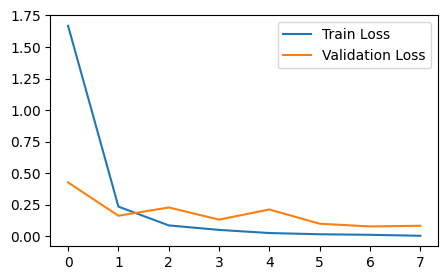

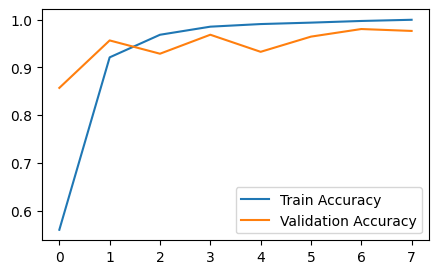

In [13]:
# Plot the loss value
plt.figure(figsize=(5,3))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.figure(figsize=(5,3))
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()

In [14]:
# Classification Report
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)

print(classification_report(y_pred, labelEnc_test))

8/8 [==============================] - 3s 350ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         8
           6       1.00      0.82      0.90        11
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         6
           9       1.00      1.00      1.00         6
          10       1.00      0.88      0.93         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         6
          16       1.00     

Text(0.5, 1.0, 'Confusion Matrix')

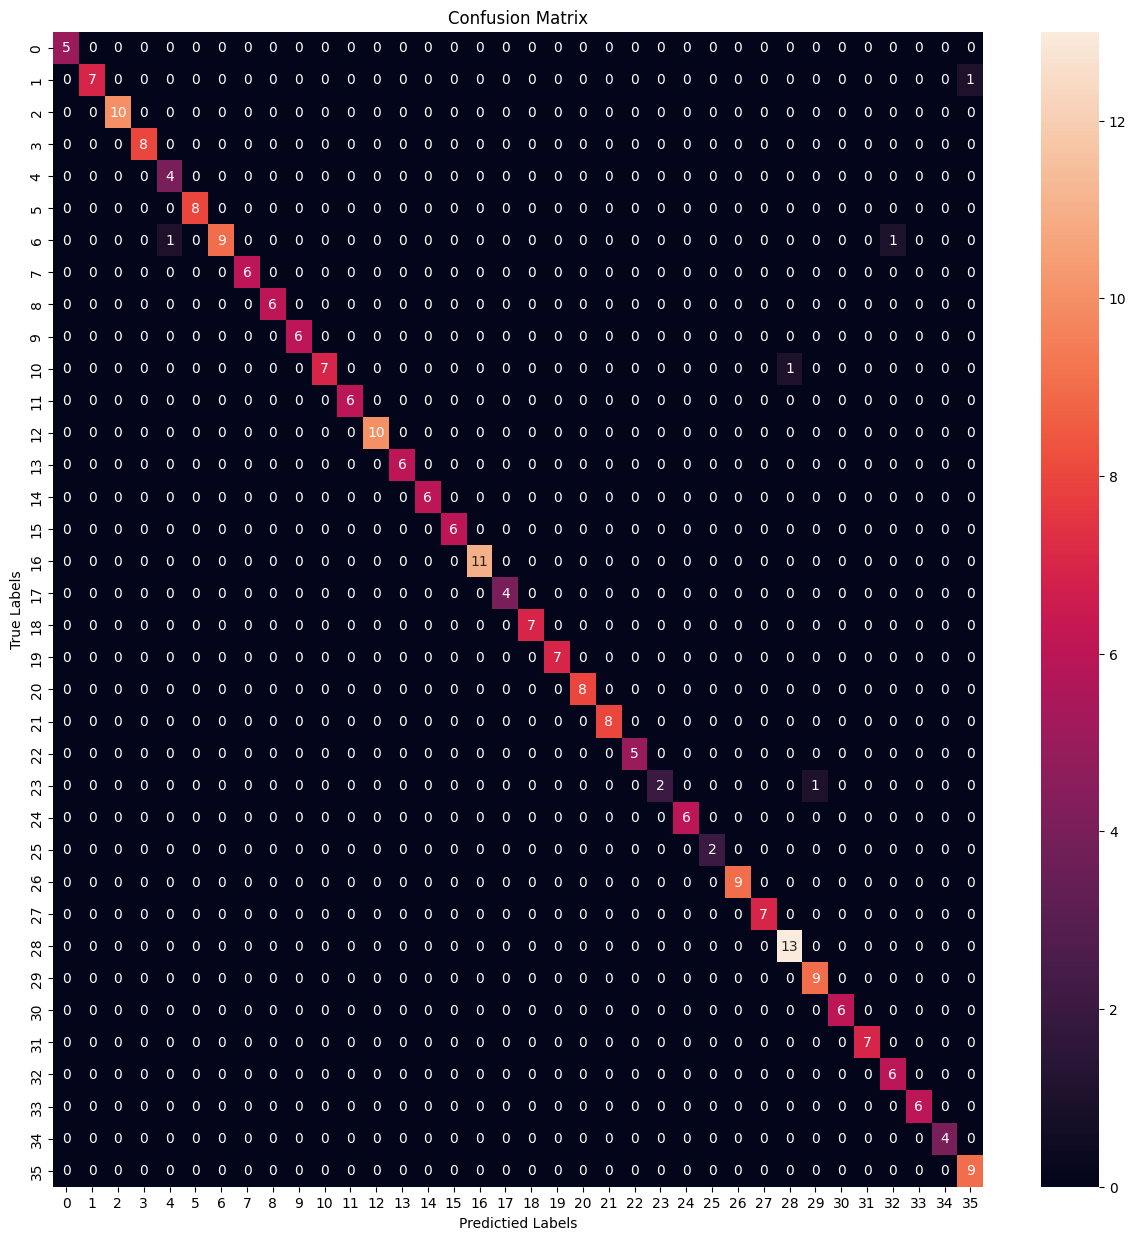

In [15]:
# Confusion Matrix
cmatrix = confusion_matrix(y_pred, labelEnc_test)
fig, ax = plt.subplots(figsize=(15, 15))
sn.heatmap(cmatrix,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predictied Labels');ax.set_ylabel('True Labels');
ax.set_title('Confusion Matrix')

In [16]:
model.save("model.h5")


In [17]:
mod = tf.keras.models.load_model('model.h5')


1/1 [==============================] - 1s 529ms/step
The Prediction For This Image = 25
The Actual Prediction For This Image = 25


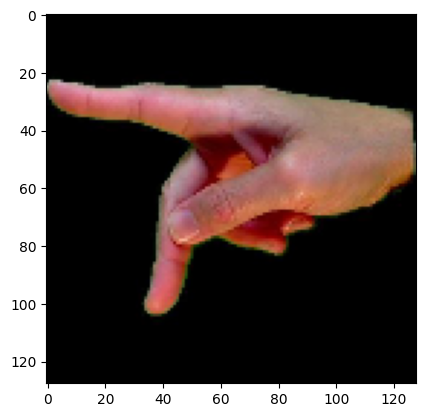

In [18]:
idx = np.random.randint(0,x_test.shape[0])
pic = x_test[idx]
Ipic = np.expand_dims(pic,axis=0)
IFpic = mod.predict(Ipic)
predictions = np.argmax(IFpic)
print("The Prediction For This Image =",predictions)
print("The Actual Prediction For This Image =",labelEnc_test[idx])
fig,ax = plt.subplots()
ax.imshow(pic)
plt.imshow(pic)

In [19]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.2/294.2 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
  

In [20]:
labels = np.unique(y_train)
labels

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c',
       'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p',
       'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'], dtype='<U1')

In [21]:
def predict_input_image(img):
    image = img.reshape(-1,128,128,3)
    prediction = mod.predict(image)[0]
    confidences = {labels[i]: float(prediction[i]) for i in range(36)}
    return confidences

In [22]:
import gradio as gr
image = gr.inputs.Image(shape=(128,128))
label = gr.outputs.Label(num_top_classes=3)
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,
             interpretation='default', title = "Sign Language Classification",
             examples=["/content/drive/MyDrive/Colab Notebooks/asl_dataset/6/hand1_6_bot_seg_4_cropped.jpeg",
                       "/content/drive/MyDrive/Colab Notebooks/asl_dataset/n/hand1_n_bot_seg_4_cropped.jpeg"]).launch(debug='True')

<ipython-input-22-b9260aee362d>:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(128,128))
<ipython-input-22-b9260aee362d>:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(128,128))
<ipython-input-22-b9260aee362d>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=3)
<ipython-input-22-b9260aee362d>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 39ms/step
Keyboard interruption in main thread... closing server.
